In [2]:
#importo librerias a usar

import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# abro los datasets a utilizar
accesos_Internet_BandaAncha_BandaAngosta = pd.read_csv('datasests/internet/accesos_Internet_BandaAncha_BandaAngosta.csv')

### inicio la limpieza 
#borrar la columna periodo para dejar solo el ano y total
accesos_Internet_BandaAncha_BandaAngosta = accesos_Internet_BandaAncha_BandaAngosta.drop(['Periodo'], axis=1)
accesos_Internet_BandaAncha_BandaAngosta = accesos_Internet_BandaAncha_BandaAngosta.rename(columns={'AÃ±o': 'Año'})
accesos_Internet_BandaAncha_BandaAngosta = accesos_Internet_BandaAncha_BandaAngosta.drop(['Total'], axis=1)




#visualizo como quedo
accesos_Internet_BandaAncha_BandaAngosta.head()

,Año,Trimestre,Banda ancha fija,Dial up
0,2022,4,11,12
1,2022,3,11,12
2,2022,2,11,12
3,2022,1,11,13
4,2021,4,10,13


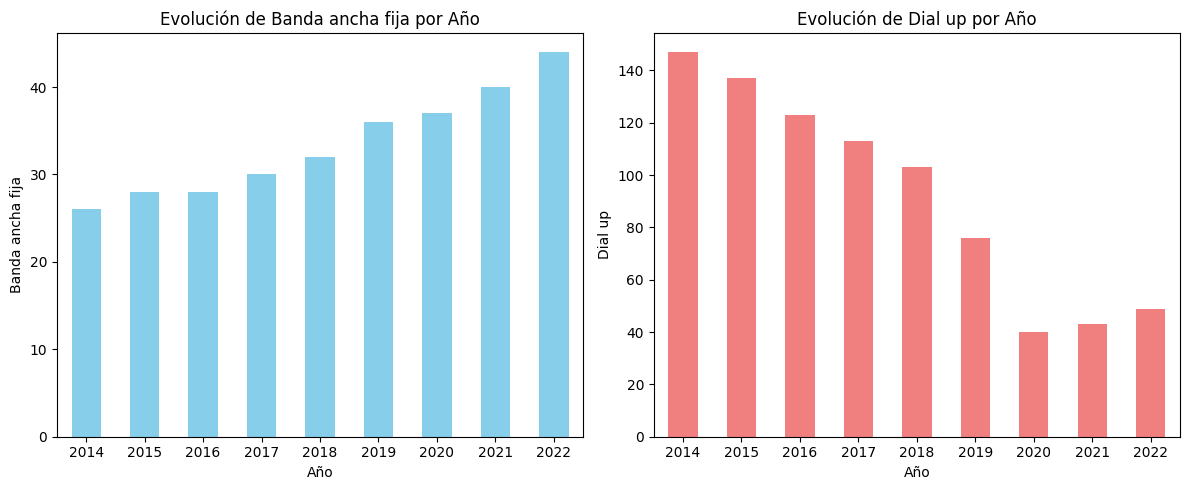

In [14]:
### iniciamos el primer analisis

# Agrupar por Año y sumar los valores de Banda ancha fija
evolucion_banda_ancha = accesos_Internet_BandaAncha_BandaAngosta.groupby('Año')['Banda ancha fija'].sum()

# Agrupar por Año y sumar los valores de Dial up
evolucion_dial_up = accesos_Internet_BandaAncha_BandaAngosta.groupby('Año')['Dial up'].sum()

# Crear una figura con dos subplots uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primer gráfico: Banda ancha fija
evolucion_banda_ancha.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Banda ancha fija')
axes[0].set_title('Evolución de Banda ancha fija por Año')
axes[0].tick_params(rotation=0)

# Segundo gráfico: Dial up
evolucion_dial_up.plot(kind='bar', color='lightcoral', ax=axes[1])
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Dial up')
axes[1].set_title('Evolución de Dial up por Año')
axes[1].tick_params(rotation=0)

plt.tight_layout()
plt.show()

conlcusion :

Se puede apreciar una clara tendencia en los graficos. el Dial up fue unas de las primeras tecnologias que tenia la gente para entrar en internet y de las mas baratas .
por eso en los anio mas viejos se ve que su demanda era superior a la de banda ancha. Luego a medida que los anios fueron pasando la banda ancha se fue volviendo mas economica y con un mejor servicio, lo que llevo a la gente a ir dejando el dial up de lado y optar por la banda ancha fija.

En cuanto a anailis de negocio, como empresa de telecomunicaciones, conviene centrarse tegnologias mas nuevas , mas economicas y mas veloces. Si realizamos una proyeccion de los datos, el dial up tiende a desaparecer y la banda ancha tiende a crecer.  En este caso lo que el publico esta buscando es banda ancha fija. 

In [12]:
# abro los datasets a utilizar
Internet_fijo_tecnología_provincia = pd.read_csv('datasests\internet\Internet_fijo_tecnología_provincia.csv')

### inicio la limpieza
Internet_fijo_tecnología_provincia = Internet_fijo_tecnología_provincia.rename(columns={'AÃ±o': 'Año'})
Internet_fijo_tecnología_provincia = Internet_fijo_tecnología_provincia.drop(['Total'], axis=1)
Internet_fijo_tecnología_provincia = Internet_fijo_tecnología_provincia.drop(Internet_fijo_tecnología_provincia.index[-1])
# Cambiar el tipo de datos de las columnas especificadas a int
columnas_a_convertir = ['Fibra Ã³ptica', 'ADSL', 'Cablemodem','Wireless','Otros','Año']
Internet_fijo_tecnología_provincia[columnas_a_convertir] = Internet_fijo_tecnología_provincia[columnas_a_convertir].astype(int)

#visualizo como quedo
Internet_fijo_tecnología_provincia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra Ã³ptica,Wireless,Otros
0,2022,4,Buenos Aires,326,3,1,130,72
1,2022,4,Capital Federal,139,1,139,5,32
2,2022,4,Catamarca,9,11,47,1,2
3,2022,4,Chaco,25,61,47,8,3
4,2022,4,Chubut,45,74,10,31,9


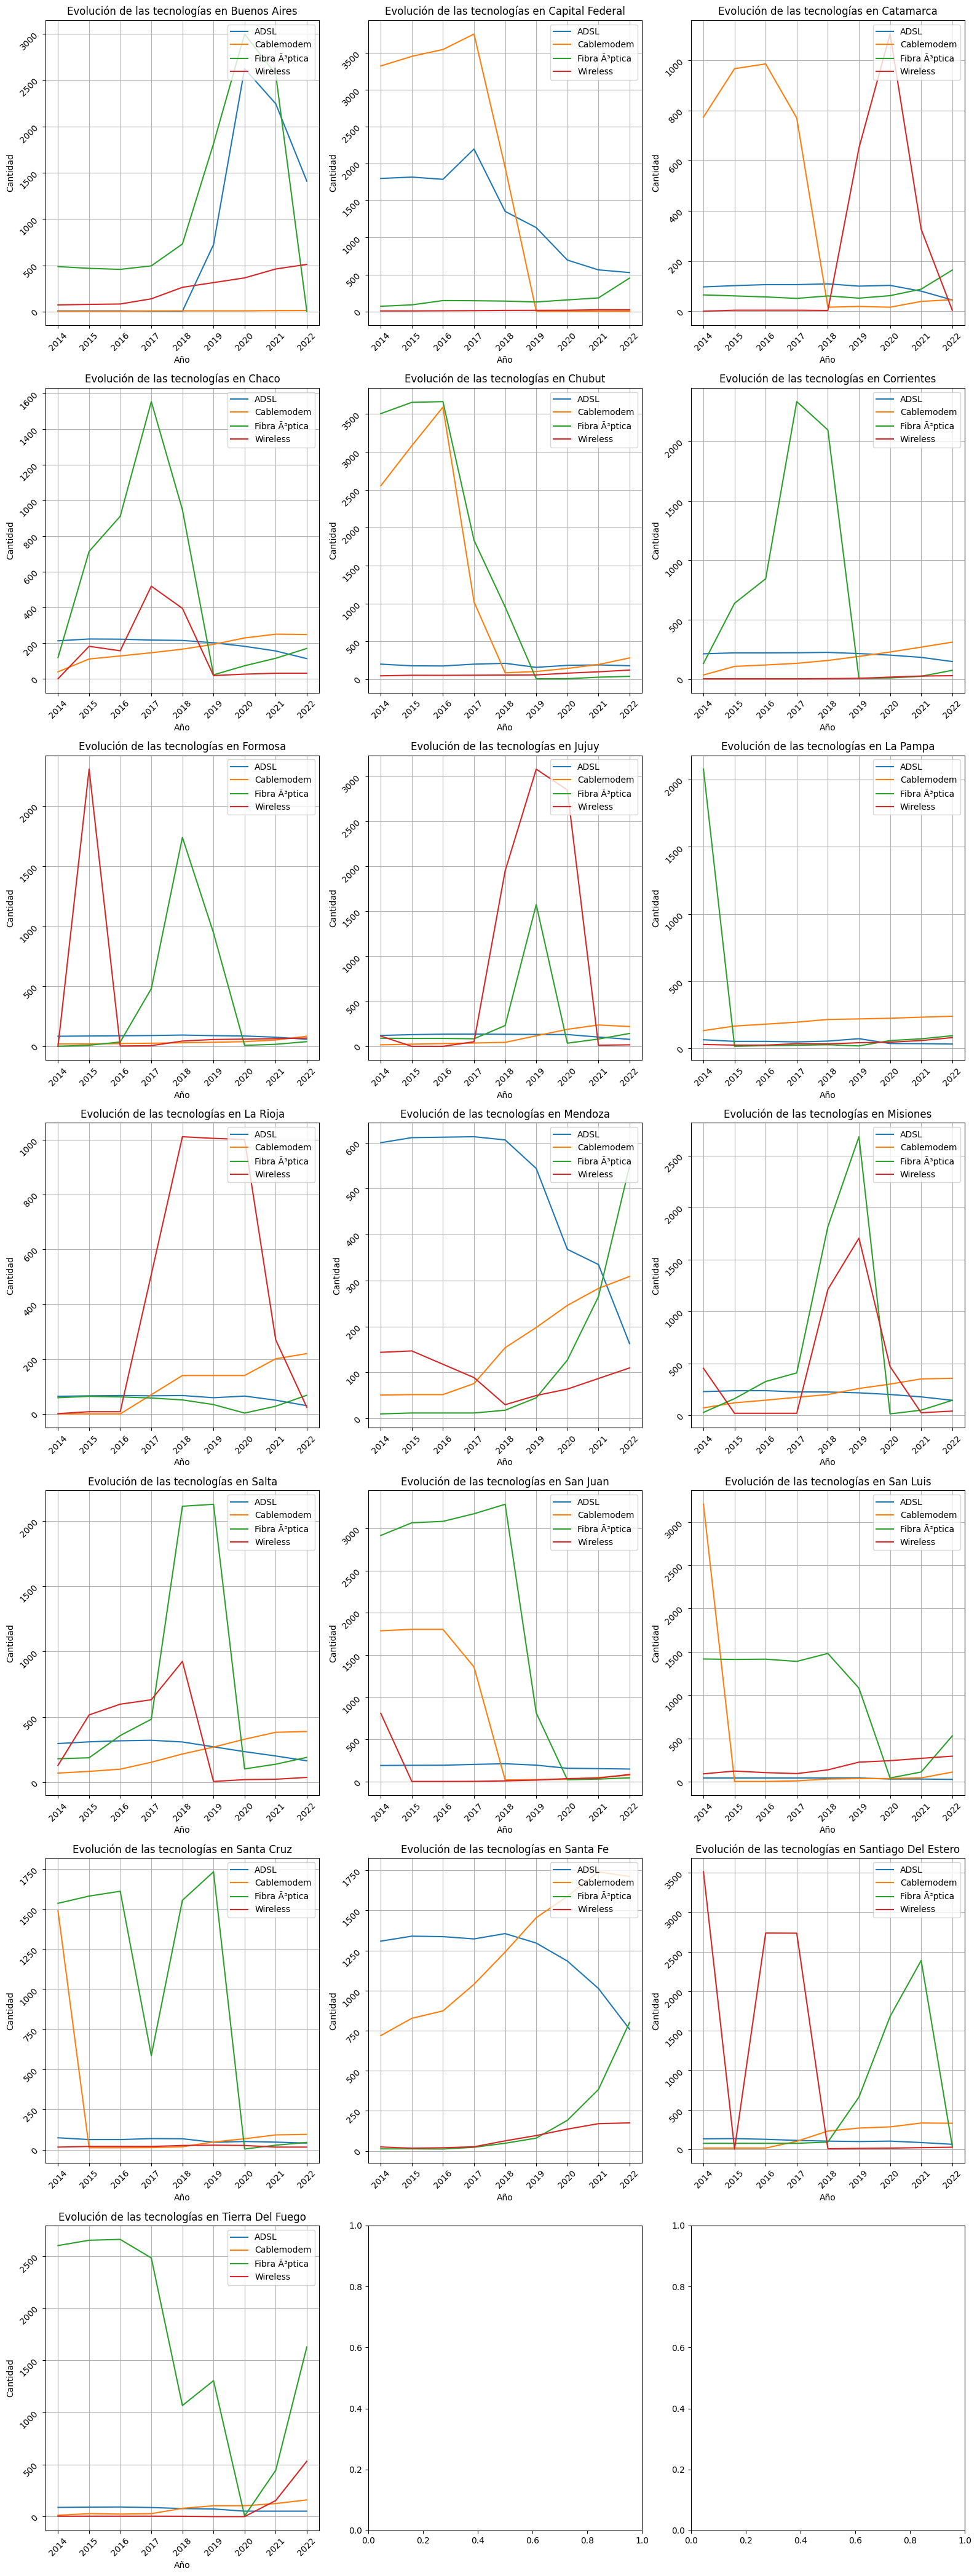

In [15]:
### iniciamos el analisis

# Lista de provincias a graficar
provincias_a_graficar = ['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
   'Corrientes', 'Formosa', 'Jujuy','La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
   'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego']

# Calcular el número de filas y columnas para los subplots
num_provincias = len(provincias_a_graficar)
num_filas = num_provincias // 3 + (num_provincias % 3 > 0)  # Divide las provincias en filas de 3
num_columnas = 3

# Crear una figura con subplots uno al lado del otro
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(16, 6*num_filas))

for i, provincia in enumerate(provincias_a_graficar):
    fila = i // 3
    columna = i % 3
    
    # Filtrar los datos solo para la provincia actual
    datos_provincia = Internet_fijo_tecnología_provincia[Internet_fijo_tecnología_provincia['Provincia'] == provincia]
    
    # Agregar todos los datos de la provincia
    total_por_trimestre = datos_provincia.groupby(['Año']).sum()
    
    # Graficar las tecnologías de la provincia en el subplot correspondiente
    total_por_trimestre[['ADSL', 'Cablemodem', 'Fibra Ã³ptica', 'Wireless']].plot(kind='line', ax=axes[fila, columna])
    
    axes[fila, columna].set_xlabel('Año')
    axes[fila, columna].set_ylabel('Cantidad')
    axes[fila, columna].set_title(f'Evolución de las tecnologías en {provincia}')
    axes[fila, columna].legend(loc='upper right')
    axes[fila, columna].tick_params(rotation=45)
    axes[fila, columna].grid()

plt.tight_layout()
plt.show()